<a href="https://colab.research.google.com/github/erzdwin/Talento_Tech_IA/blob/main/Tarea_Regresion_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np


Análisis exploratorio de los datos

In [3]:
df_salary = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Salary_Data.csv')
df_salary.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


Dataset tomado de: https://www.kaggle.com/datasets/shubham47/salary-data-dataset-for-linear-regression?resource=download

In [4]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [5]:
df_salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


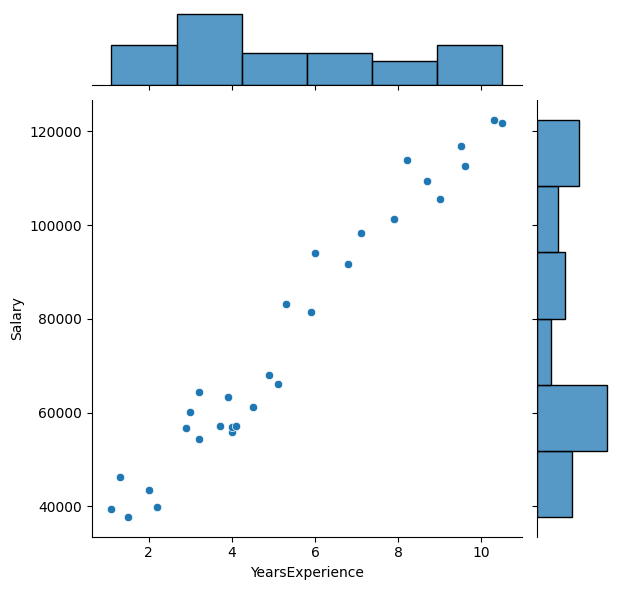

In [6]:

sns.jointplot(x="YearsExperience", y="Salary", data=df_salary)

Preparando los datos

In [9]:
# extrayendo la información del dataset
X = df_salary[["YearsExperience"]]
y = df_salary["Salary"]

# particionando en dos conjuntos _train y _test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) #size 25%
print(X_train.shape)
print(X_test.shape)

(22, 1)
(8, 1)


Modelo de Regresiòn Lineal

In [11]:
# crear el modelo
regressor = LinearRegression(fit_intercept = True)
# entrenarlo con los datos
regressor.fit(X_train, y_train)

# el modelo tendrá dos parámetros (A y B fueron llamados en el documento)
print(f"La pendiente del modelo (B) es: {regressor.coef_}, el intersecto (A) es {regressor.intercept_}")

La pendiente del modelo (B) es: [9430.11983429], el intersecto (A) es 25035.27996090601


Evaluaciòn del modelo

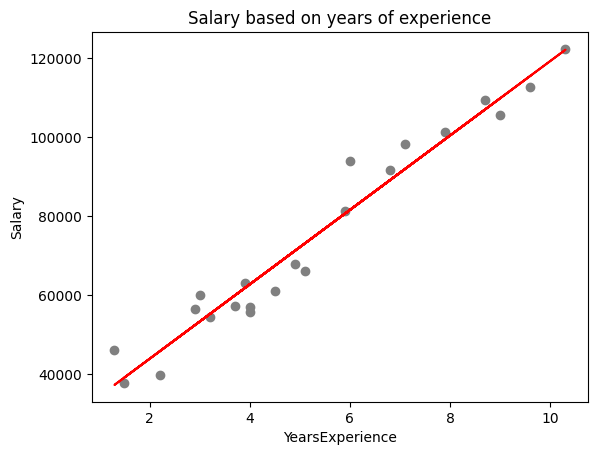

In [15]:
y_pred = regressor.predict(X_test)

plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.ylabel('Salary')
plt.xlabel('YearsExperience')
plt.title('Salary based on years of experience')
plt.show()

Text(0.5, 1.0, 'Salary based on years of experiencea (test data)')

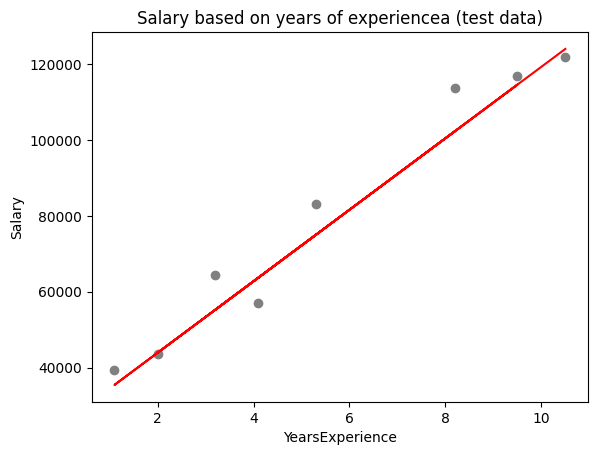

In [16]:
# VISUALIZE TEST SET RESULTS
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, regressor.predict(X_test), color = 'red')
plt.ylabel('Salary')
plt.xlabel('YearsExperience')
plt.title('Salary based on years of experiencea (test data)')


Error Cuadratico Medio

In [20]:
# evaluando el comportamiento del modelo
print("Mean Squared Error:",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Squared Error: 43900047.88225083
Root Mean Squared Error: 6625.711122758887


In [22]:
# Calcula el coeficiente de determinación (R^2)
r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de determinación (R^2): {r2}")


Coeficiente de determinación (R^2): 0.9562280508084468


Error Medio Absoluto

In [25]:

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error:",mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 5525.769731415572


R cuadrado

In [26]:
from sklearn.metrics import r2_score
print("R^2:",r2_score(y_test, y_pred))

R^2: 0.9562280508084468


Coeficiente de determinaciòn (R^2) e Histograma de residuos



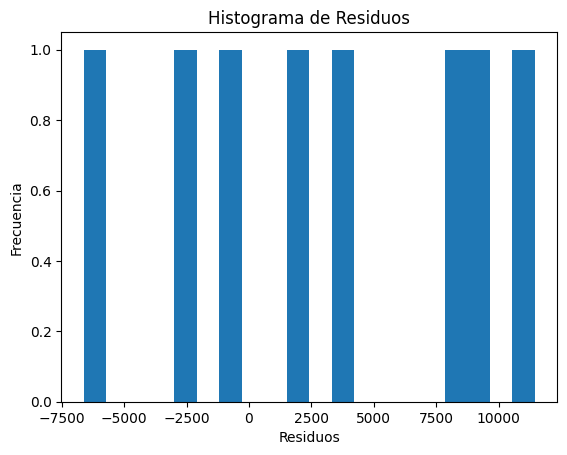

In [23]:
# Calcula los residuos
residuals = y_test - y_pred

# Crea un histograma de los residuos
plt.hist(residuals, bins=20)
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Histograma de Residuos")
plt.show()

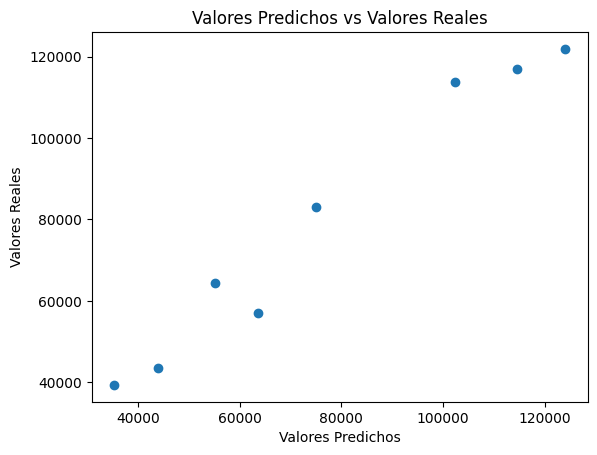

In [27]:
plt.scatter(y_pred, y_test)
plt.xlabel("Valores Predichos")
plt.ylabel("Valores Reales")
plt.title("Valores Predichos vs Valores Reales")
plt.show()

**Conclusiones**

El modelo de regresión lineal se ajusta bastante bien a los datos. El coeficiente de determinación (R^2) es alto, lo que indica que el modelo explica una gran parte de la variabilidad en los datos. Además, el error cuadrático medio y el error absoluto medio son relativamente bajos, lo que indica que el modelo hace predicciones precisas.

El modelo funciona encontrando la línea recta que mejor se ajusta a los datos. Esta línea se puede utilizar para predecir el salario de una persona en función de sus años de experiencia. La pendiente de la línea representa el cambio en el salario por cada año adicional de experiencia. El intercepto representa el salario cuando la experiencia es cero.

